In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score


### Question 1 Gisette Dataset

In [2]:
#Importing the dataset
data_train = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Gisette/gisette_train.data')
data_train
data_train_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Gisette/gisette_train_labels.labels')
data_test = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Gisette/gisette_valid.data')
data_test_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Gisette/gisette_valid_labels.labels')
data_train.shape,data_train_labels.shape,data_test.shape,data_test_labels.shape
#No Null data present at this stage

#Converting -1 to 0 
data_train_labels = np.where(data_train_labels == -1,0,1)
data_test_labels = np.where(data_test_labels == -1,0,1)

In [3]:
#Standardizing the training data
data_train = pd.DataFrame(data_train)
means = np.array(data_train.apply(lambda x : np.mean(x),axis = 0))
means = means.reshape(1,means.shape[0])
std_devs = np.array(data_train.apply(lambda x : np.std(x)))
std_devs = std_devs.reshape(1,std_devs.shape[0])
data_train = np.array(data_train)
data_train.shape
data_train = (data_train - means)/std_devs #final data

#standardizing the test data
data_test = pd.DataFrame(data_test)
#meanst = np.array(data_test.apply(lambda x : np.mean(x),axis = 0))
#meanst = meanst.reshape(1,meanst.shape[0])
#std_devst = np.array(data_test.apply(lambda x : np.std(x)))
#std_devst = std_devst.reshape(1,std_devst.shape[0])
data_test = np.array(data_test)
data_test.shape
data_test = (data_test - means)/std_devs   #final data

data_train.shape,data_test.shape

data_train = pd.DataFrame(data_train)
data_test = pd.DataFrame(data_test)
data_train_labels = pd.DataFrame(data_train_labels)
data_test_labels = pd.DataFrame(data_test_labels)

#

C:\Users\Sourita Nag\AppData\Local\Temp\ipykernel_22384\240282776.py:9: RuntimeWarning: invalid value encountered in divide
  data_train = (data_train - means)/std_devs #final data
C:\Users\Sourita Nag\AppData\Local\Temp\ipykernel_22384\240282776.py:19: RuntimeWarning: divide by zero encountered in divide
  data_test = (data_test - means)/std_devs   #final data
C:\Users\Sourita Nag\AppData\Local\Temp\ipykernel_22384\240282776.py:19: RuntimeWarning: invalid value encountered in divide
  data_test = (data_test - means)/std_devs   #final data


In [3]:
Dropping the columns with NaN values
#For training data
cols1 = data_train.columns[data_train.isnull().any()].tolist()
print(len(cols1))
cols1
data_train = data_train.drop(cols1,axis = 1)
data_train.shape
np.where(data_train.isnull().any()) # No null values any more
data_train.shape

#For test Data
cols2 = data_test.columns[data_test.isnull().any()].tolist()
cols2
print(len(cols2))
data_test = data_test.drop(cols2,axis = 1)
data_test.shape

#Checking whether any values are present any more
print(np.where(data_train.isnull().any()))
print(np.where(data_test.isnull().any()))
print(np.where(data_train_labels.isnull().any()))
print(np.where(data_test_labels.isnull().any()))

X_train = np.array(data_train)
Y_labels_train = np.array(data_train_labels)
X_test = np.array(data_test)
Y_labels_test = np.array(data_test_labels)
X_train.shape,Y_labels_train.shape,X_test.shape,Y_labels_test.shape

X_ones_train =np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_ones_train, X_train))
print(X_train.shape)

X_ones_test = np.ones((X_test.shape[0],1))
X_test = np.hstack((X_ones_test,X_test))
print(X_test.shape)

print(Y_labels_train.shape)
print(Y_labels_test.shape)

C:\Users\Sourita Nag\AppData\Local\Temp\ipykernel_27588\1453913403.py:9: RuntimeWarning: invalid value encountered in divide
  data_train = (data_train - means)/std_devs #final data
C:\Users\Sourita Nag\AppData\Local\Temp\ipykernel_27588\1453913403.py:19: RuntimeWarning: divide by zero encountered in divide
  data_test = (data_test - means)/std_devs   #final data
C:\Users\Sourita Nag\AppData\Local\Temp\ipykernel_27588\1453913403.py:19: RuntimeWarning: invalid value encountered in divide
  data_test = (data_test - means)/std_devs   #final data


45
45
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(6000, 4956)
(1000, 4956)
(6000, 1)
(1000, 1)


In [4]:
#Sigmoid function
def sigmoid(z):
    return(1/(1 + np.exp(-z)))

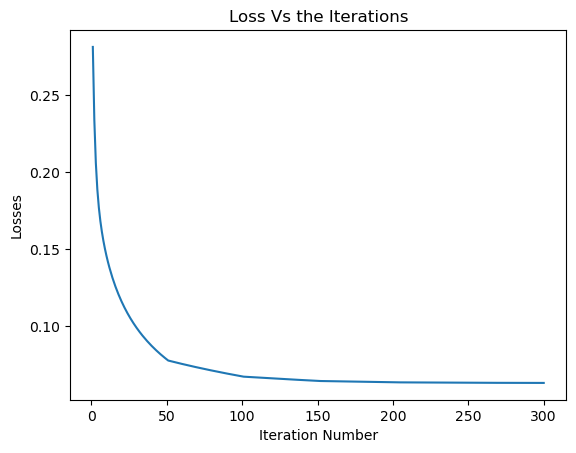

[0.00013717 0.00041152 0.00123457 0.0037037  0.01111111 0.03333333]
0.010166666666666666
0.021
    Dataset Misclassification Error
0  Training                    1.0%
1   Testing                    2.1%


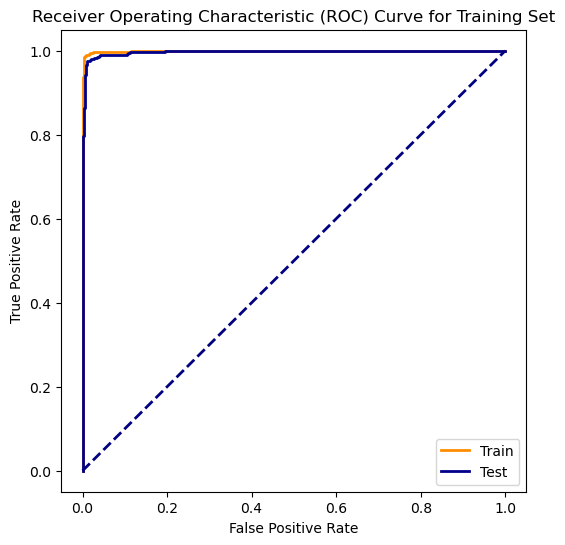

In [5]:
niter = 300
lam = 0.0001
eta = 0.1
etas = []

N = X_train.shape[0]
loss = []
wts = []
w = np.zeros((X_train.shape[1],1))
wts.append(w)

for i in range(niter):
    w_ini = wts[i]
    XY = X_train.T@Y_labels_train
    sig_Xw = sigmoid(X_train@w_ini)
    Xsig = X_train.T@sig_Xw
    gradient = XY - Xsig
    w_upd = w_ini - eta*lam*w_ini + eta*gradient/N
    wts.append(w_upd)
    losstr = Y_labels_train.T@X_train@w_upd - np.sum(np.log(1+(np.exp(X_train@w_upd))))
    #losstr = np.sum(Y_labels_train*X_train@w_upd - np.log((1+np.exp(X_train@w_upd))))
    total_loss = -1/N*losstr + lam*w_upd.T@w_upd
    loss.append(total_loss[0,0])
    
    if i % 50 == 0:
        eta = eta / 3
    etas.append(eta)
plt.plot(np.arange(1,len(loss)+1,1),loss)
plt.title('Loss Vs the Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Losses')
plt.show()
print(np.unique(etas))
#plt.plot(etas,loss)

#Predicted values
weights = wts[-1]
weights.shape

#Getting a linear classification boundary
pred_score_train = np.exp((X_train@weights))
pred_score_train
pred_labels_train = np.where(pred_score_train > 1, 1, 0)
pred_labels_train

miss_error_train = np.mean(pred_labels_train != Y_labels_train )
print(miss_error_train)

pred_score_test = np.exp(X_test@weights)
pred_score_test
pred_labels_test = np.where(pred_score_test > 1, 1, 0)
pred_labels_test

miss_error_test = np.mean(pred_labels_test != Y_labels_test)
print(miss_error_test)

error_table = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Misclassification Error': [f'{np.round(miss_error_train,3)*100}%', f'{miss_error_test*100}%']
})
print(error_table)

#ROC Curve for training
fpr1, tpr1, thresholds1 = roc_curve(Y_labels_train, pred_score_train)
fpr2, tpr2, thresholds2 = roc_curve(Y_labels_test, pred_score_test)
plt.figure(figsize=(6, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2,label = 'Train')#, label=f'AUC = {roc_auc:.2f}'
plt.plot(fpr2, tpr2, color='darkblue', lw=2,label = 'Test')#, label=f'AUC = {roc_auc:.2f}'
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
plt.show()

### Dataset Madelon

In [6]:
#Importing the dataset
data_train = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Madelon/madelon_train.data')
data_train
data_train_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Madelon/madelon_train.labels')
data_test = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Madelon/madelon_valid.data')
data_test_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Madelon/madelon_valid.labels')
data_train.shape,data_train_labels.shape,data_test.shape,data_test_labels.shape
#No Null data present at this stage

data_train_labels = np.where(data_train_labels == -1,0,1)
data_test_labels = np.where(data_test_labels == -1,0,1)

#Standardizing the training data
data_train = pd.DataFrame(data_train)
means = np.array(data_train.apply(lambda x : np.mean(x),axis = 0))
means = means.reshape(1,means.shape[0])
std_devs = np.array(data_train.apply(lambda x : np.std(x)))
std_devs = std_devs.reshape(1,std_devs.shape[0])
data_train = np.array(data_train)
data_train.shape
data_train = (data_train - means)/std_devs #final data

#standardizing the test data
data_test = pd.DataFrame(data_test)
#meanst = np.array(data_test.apply(lambda x : np.mean(x),axis = 0))
#meanst = meanst.reshape(1,meanst.shape[0])
#std_devst = np.array(data_test.apply(lambda x : np.std(x)))
#std_devst = std_devst.reshape(1,std_devst.shape[0])
data_test = np.array(data_test)
data_test.shape
data_test = (data_test - means)/std_devs   #final data
data_train.shape,data_test.shape

data_train = pd.DataFrame(data_train)
data_test = pd.DataFrame(data_test)
data_train_labels = pd.DataFrame(data_train_labels)
data_test_labels = pd.DataFrame(data_test_labels)

#Dropping the columns with NaN values
#For training data
cols1 = data_train.columns[data_train.isnull().any()].tolist()
print(len(cols1))
cols1

cols2 = data_test.columns[data_test.isnull().any()].tolist()
cols2
print(len(cols2))
#No Null columns for train and test

#Checking whether any values are present any more
print(np.where(data_train.isnull().any()))
print(np.where(data_test.isnull().any()))
print(np.where(data_train_labels.isnull().any()))
print(np.where(data_test_labels.isnull().any())) 

X_train = np.array(data_train)
Y_labels_train = np.array(data_train_labels)
X_test = np.array(data_test)
Y_labels_test = np.array(data_test_labels)
X_train.shape,Y_labels_train.shape,X_test.shape,Y_labels_test.shape

X_ones_train =np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_ones_train, X_train))
print(X_train.shape)

X_ones_test = np.ones((X_test.shape[0],1))
X_test = np.hstack((X_ones_test,X_test))
print(X_test.shape)

print(Y_labels_train.shape)
print(Y_labels_test.shape)



0
0
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(2000, 501)
(600, 501)
(2000, 1)
(600, 1)


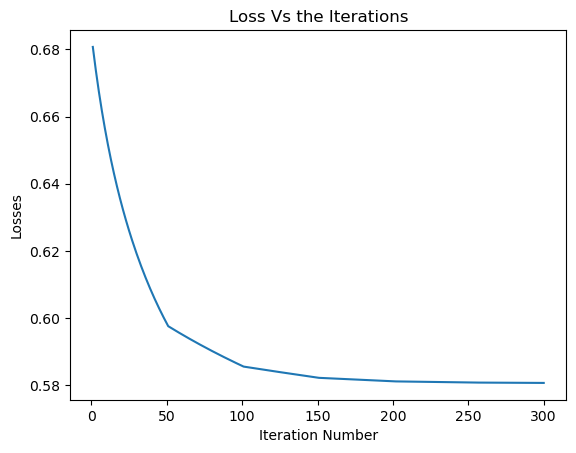

[0.00013717 0.00041152 0.00123457 0.0037037  0.01111111 0.03333333]
0.2895
0.41833333333333333
    Dataset Misclassification Error
0  Training                  28.95%
1   Testing                   41.8%


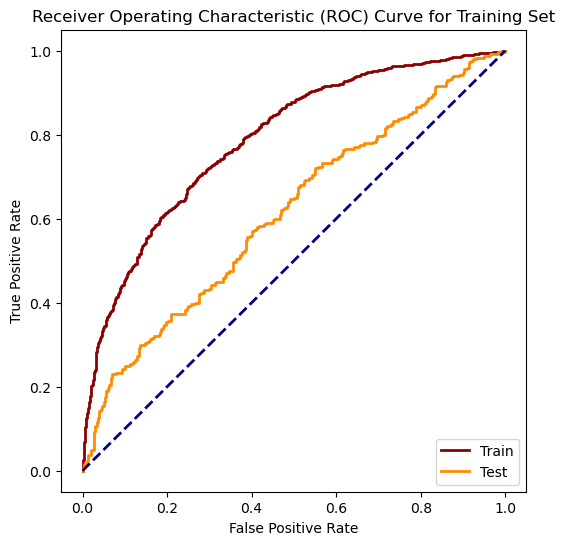

In [7]:
niter = 300
lam = 0.0001
eta = 0.1
etas = []

N = X_train.shape[0]
loss = []
wts = []
w = np.zeros((X_train.shape[1],1))
wts.append(w)

for i in range(niter):
    w_ini = wts[i]
    XY = X_train.T@Y_labels_train
    sig_Xw = sigmoid(X_train@w_ini)
    Xsig = X_train.T@sig_Xw
    gradient = XY - Xsig
    w_upd = w_ini - eta*lam*w_ini + eta*gradient/N
    wts.append(w_upd)
    losstr = Y_labels_train.T@X_train@w_upd - np.sum(np.log(1+(np.exp(X_train@w_upd))))
    total_loss = -1/N*losstr + lam*w_upd.T@w_upd
    loss.append(total_loss[0,0])
    
    if i % 50 == 0:
        eta = eta / 3
    etas.append(eta)
plt.plot(np.arange(1,len(loss)+1,1),loss)
plt.title('Loss Vs the Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Losses')
plt.show()
print(np.unique(etas))
#plt.plot(etas,loss)

#Predicted values
weights = wts[-1]
weights.shape

#Getting a linear classification boundary
pred_score_train =np.exp(X_train@weights)
pred_score_train
pred_labels_train = np.where(pred_score_train > 1, 1, 0)
pred_labels_train

miss_error_train = np.mean(pred_labels_train != Y_labels_train )
print(miss_error_train)

pred_score_test = np.exp(X_test@weights)
pred_score_test
pred_labels_test = np.where(pred_score_test > 1, 1, 0)
pred_labels_test

miss_error_test = np.mean(pred_labels_test != Y_labels_test)
print(miss_error_test)

error_table = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Misclassification Error': [f'{miss_error_train*100}%', f'{np.round(miss_error_test,3)*100}%']
})
print(error_table)

#ROC Curve for training
fpr1, tpr1, thresholds1 = roc_curve(Y_labels_train, pred_score_train)
fpr2, tpr2, thresholds2 = roc_curve(Y_labels_test, pred_score_test)
plt.figure(figsize=(6, 6))
plt.plot(fpr1, tpr1, color='darkred', lw=2,label = 'Train')#, label=f'AUC = {roc_auc:.2f}'
plt.plot(fpr2, tpr2, color='darkorange', lw=2,label = 'Test')#, label=f'AUC = {roc_auc:.2f}'
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
plt.show()

### Dataset Dexter

In [8]:
data_train = pd.read_csv('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Dexter/dexter_train.csv',header = None)
data_train.shape
data_train_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Dexter/dexter_train.labels')
data_test = pd.read_csv('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Dexter/dexter_valid.csv',header = None)
data_test_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Dexter/dexter_valid.labels')
data_train.shape,data_train_labels.shape,data_test.shape,data_test_labels.shape

data_train_labels = np.where(data_train_labels == -1,0,1)
data_test_labels = np.where(data_test_labels == -1,0,1)

#Standardizing the training data
data_train = pd.DataFrame(data_train)
means = np.array(data_train.apply(lambda x : np.mean(x),axis = 0))
means = means.reshape(1,means.shape[0])
std_devs = np.array(data_train.apply(lambda x : np.std(x)))
std_devs = std_devs.reshape(1,std_devs.shape[0])
data_train = np.array(data_train)
data_train.shape
data_train = (data_train - means)/std_devs #final data

#standardizing the test data
data_test = pd.DataFrame(data_test)
#meanst = np.array(data_test.apply(lambda x : np.mean(x),axis = 0))
#meanst = meanst.reshape(1,meanst.shape[0])
#std_devst = np.array(data_test.apply(lambda x : np.std(x)))
#std_devst = std_devst.reshape(1,std_devst.shape[0])
data_test = np.array(data_test)
data_test.shape
data_test = (data_test - means)/std_devs   #final data
data_train.shape,data_test.shape

data_train = pd.DataFrame(data_train)
data_test = pd.DataFrame(data_test)
data_train_labels = pd.DataFrame(data_train_labels)
data_test_labels = pd.DataFrame(data_test_labels)

#Dropping the columns with NaN values
#For training data
cols1 = data_train.columns[data_train.isnull().any()].tolist()
print(len(cols1))
cols1

cols2 = data_test.columns[data_test.isnull().any()].tolist()
cols2
print(len(cols2))
#No Null columns for train and test
cols1 == cols2
#As the two columns have the same number of null values so we just go ahead and drop those

data_train = data_train.drop(cols1,axis = 1)
data_train.shape
np.where(data_train.isnull().any()) # No null values any more
print(data_train.shape)

data_test = data_test.drop(cols2,axis = 1)
print(data_test.shape)

#Checking whether any values are present any more
print(np.where(data_train.isnull().any()))
print(np.where(data_test.isnull().any()))
print(np.where(data_train_labels.isnull().any()))
print(np.where(data_test_labels.isnull().any())) 

X_train = np.array(data_train)
Y_labels_train = np.array(data_train_labels)
X_test = np.array(data_test)
Y_labels_test = np.array(data_test_labels)
X_train.shape,Y_labels_train.shape,X_test.shape,Y_labels_test.shape


X_ones_train =np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_ones_train, X_train))
print(X_train.shape)

X_ones_test = np.ones((X_test.shape[0],1))
X_test = np.hstack((X_ones_test,X_test))
print(X_test.shape)

print(Y_labels_train.shape)
print(Y_labels_test.shape)

C:\Users\Sourita Nag\AppData\Local\Temp\ipykernel_27588\2298125429.py:19: RuntimeWarning: invalid value encountered in divide
  data_train = (data_train - means)/std_devs #final data
C:\Users\Sourita Nag\AppData\Local\Temp\ipykernel_27588\2298125429.py:29: RuntimeWarning: divide by zero encountered in divide
  data_test = (data_test - means)/std_devs   #final data
C:\Users\Sourita Nag\AppData\Local\Temp\ipykernel_27588\2298125429.py:29: RuntimeWarning: invalid value encountered in divide
  data_test = (data_test - means)/std_devs   #final data


12249
12249
(300, 7751)
(300, 7751)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(300, 7752)
(300, 7752)
(300, 1)
(300, 1)


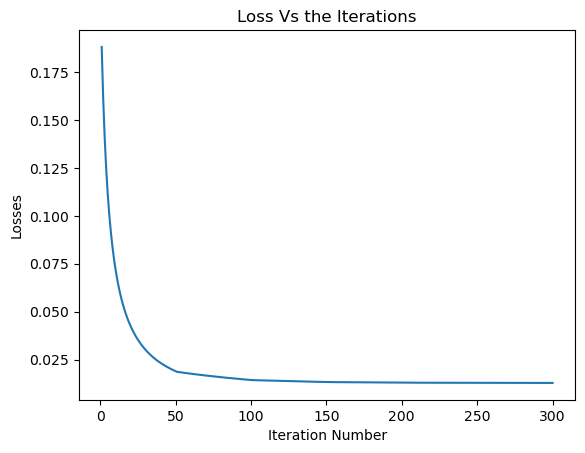

[0.00013717 0.00041152 0.00123457 0.0037037  0.01111111 0.03333333]
0.0
0.14
    Dataset Misclassification Error
0  Training                    0.0%
1   Testing     14.000000000000002%


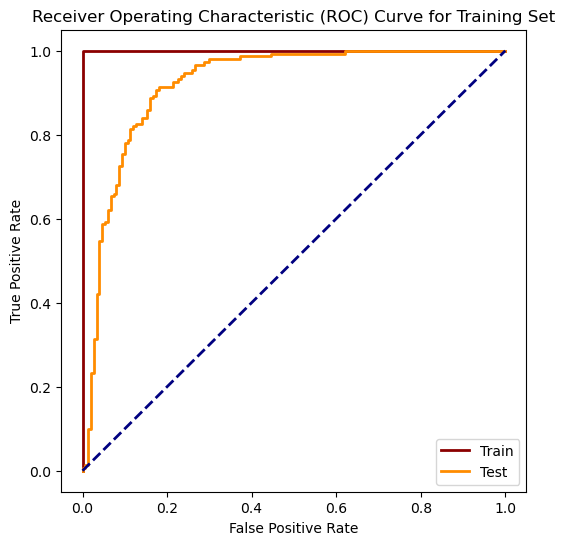

In [9]:
niter = 300
lam = 0.0001
eta = 0.1
etas = []

N = X_train.shape[0]
loss = []
wts = []
w = np.zeros((X_train.shape[1],1))
wts.append(w)

for i in range(niter):
    w_ini = wts[i]
    XY = X_train.T@Y_labels_train
    sig_Xw = sigmoid(X_train@w_ini)
    Xsig = X_train.T@sig_Xw
    gradient = XY - Xsig
    w_upd = w_ini - eta*lam*w_ini + eta*gradient/N
    wts.append(w_upd)
    losstr = Y_labels_train.T@X_train@w_upd - np.sum(np.log(1+(np.exp(X_train@w_upd))))
    total_loss = -1/N*losstr + lam*w_upd.T@w_upd
    loss.append(total_loss[0,0])
    
    if i % 50 == 0:
        eta = eta / 3
    etas.append(eta)
plt.plot(np.arange(1,len(loss)+1,1),loss)
plt.title('Loss Vs the Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Losses')
plt.show()
print(np.unique(etas))
#plt.plot(etas,loss)

#Predicted values
weights = wts[-1]
weights.shape

#Getting a linear classification boundary
pred_score_train = np.exp(X_train@weights)
pred_score_train
pred_labels_train = np.where(pred_score_train > 1, 1, 0)
pred_labels_train

miss_error_train = np.mean(pred_labels_train != Y_labels_train )
print(miss_error_train)

pred_score_test = np.exp(X_test@weights)
pred_score_test
pred_labels_test = np.where(pred_score_test > 1, 1, 0)
pred_labels_test

miss_error_test = np.mean(pred_labels_test != Y_labels_test)
print(miss_error_test)

error_table = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Misclassification Error': [f'{miss_error_train*100}%', f'{np.round(miss_error_test,2)*100}%']
})
print(error_table)

#ROC Curve for training
fpr1, tpr1, thresholds1 = roc_curve(Y_labels_train, pred_score_train)
fpr2, tpr2, thresholds2 = roc_curve(Y_labels_test, pred_score_test)
plt.figure(figsize=(6, 6))
plt.plot(fpr1, tpr1, color='darkred', lw=2,label = 'Train')#, label=f'AUC = {roc_auc:.2f}'
plt.plot(fpr2, tpr2, color='darkorange', lw=2,label = 'Test')#, label=f'AUC = {roc_auc:.2f}'
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
plt.show()

### Question 2 on Gisette Dataset

In [3]:
#Analytical solution of the above equation leads to (X'X + \lam I_p)^-1X'Y
#Importing the dataset
data_train = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Gisette/gisette_train.data')
data_train
data_train_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Gisette/gisette_train_labels.labels')
data_test = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Gisette/gisette_valid.data')
data_test_labels = np.loadtxt('C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Gisette/gisette_valid_labels.labels')
data_train.shape,data_train_labels.shape,data_test.shape,data_test_labels.shape
#No Null data present at this stage

((6000, 5000), (6000,), (1000, 5000), (1000,))

In [11]:
#data_train_labels = np.where(data_train_labels == -1,0,1)
#data_test_labels = np.where(data_test_labels == -1,0,1)

In [4]:
#Standardizing the training data
data_train = pd.DataFrame(data_train)
means = np.array(data_train.apply(lambda x : np.mean(x),axis = 0))
means = means.reshape(1,means.shape[0])
std_devs = np.array(data_train.apply(lambda x : np.std(x)))
std_devs = std_devs.reshape(1,std_devs.shape[0])
data_train = np.array(data_train)
data_train.shape
data_train = (data_train - means)/std_devs #final data

#standardizing the test data
data_test = pd.DataFrame(data_test)
#meanst = np.array(data_test.apply(lambda x : np.mean(x),axis = 0))
#meanst = meanst.reshape(1,meanst.shape[0])
#std_devst = np.array(data_test.apply(lambda x : np.std(x)))
#std_devst = std_devst.reshape(1,std_devst.shape[0])
data_test = np.array(data_test)
data_test.shape
data_test = (data_test - means)/std_devs   #final data

data_train.shape,data_test.shape

C:\Users\Sourita Nag\AppData\Local\Temp\ipykernel_28556\2988414336.py:9: RuntimeWarning: invalid value encountered in divide
  data_train = (data_train - means)/std_devs #final data
C:\Users\Sourita Nag\AppData\Local\Temp\ipykernel_28556\2988414336.py:19: RuntimeWarning: divide by zero encountered in divide
  data_test = (data_test - means)/std_devs   #final data
C:\Users\Sourita Nag\AppData\Local\Temp\ipykernel_28556\2988414336.py:19: RuntimeWarning: invalid value encountered in divide
  data_test = (data_test - means)/std_devs   #final data


((6000, 5000), (1000, 5000))

In [5]:
data_train = pd.DataFrame(data_train)
data_test = pd.DataFrame(data_test)
data_train_labels = pd.DataFrame(data_train_labels)
data_test_labels = pd.DataFrame(data_test_labels)

In [6]:
#Dropping the columns with NaN values
#For training data
cols1 = data_train.columns[data_train.isnull().any()].tolist()
print(len(cols1))
cols1
data_train = data_train.drop(cols1,axis = 1)
data_train.shape
np.where(data_train.isnull().any()) # No null values any more
print(data_train.shape)
#For test Data
cols2 = data_test.columns[data_test.isnull().any()].tolist()
cols2
print(len(cols2))
cols1 == cols2
data_test = data_test.drop(cols2,axis = 1)
data_test.shape

45
(6000, 4955)
45


(1000, 4955)

In [7]:
#Checking whether any values are present any more
print(np.where(data_train.isnull().any()))
print(np.where(data_test.isnull().any()))
print(np.where(data_train_labels.isnull().any()))
print(np.where(data_test_labels.isnull().any()))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


In [8]:
X_train = np.array(data_train)
Y_labels_train = np.array(data_train_labels)
X_test = np.array(data_test)
Y_labels_test = np.array(data_test_labels)
X_train.shape,Y_labels_train.shape,X_test.shape,Y_labels_test.shape

((6000, 4955), (6000, 1), (1000, 4955), (1000, 1))

In [9]:
X_ones_train =np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_ones_train, X_train))
print(X_train.shape)

X_ones_test = np.ones((X_test.shape[0],1))
X_test = np.hstack((X_ones_test,X_test))
print(X_test.shape)

print(Y_labels_train.shape)
print(Y_labels_test.shape)

(6000, 4956)
(1000, 4956)
(6000, 1)
(1000, 1)


In [10]:
#Analytical solution
lam = 0.0001
weights = np.linalg.inv((X_train.T@X_train + lam*np.identity(np.shape(X_train)[1])))@X_train.T@Y_labels_train
weights
weights.shape

(4956, 1)

In [13]:
#Predicted values for training set
y_hat_train = np.sign(X_train@weights)
y_hat_train.shape
y_hat_train

#Predicted values for test set
y_hat_test = np.sign(X_test@weights)
y_hat_test.shape
y_hat_test.shape

#misclassification errors
missc_error_train = np.mean(y_hat_train != Y_labels_train)
print(f'The misclassification error on the Training set is {missc_error_train*100}%')

missc_error_test = np.mean(y_hat_test != Y_labels_test)
print(f'The misclassification error on the Test set set is {missc_error_test*100}%')

Missc = pd.DataFrame({'Data':['Testing','Training'], 'Misclassification erros':[f'{missc_error_train*100}%',f'{missc_error_test*100}%']})
Missc

pred_score_train = X_train@weights
pred_score_test = X_test@weights
Missc

The misclassification error on the Training set is 0.0%
The misclassification error on the Test set set is 9.3%


,Data,Misclassification erros
0,Testing,0.0%
1,Training,9.3%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


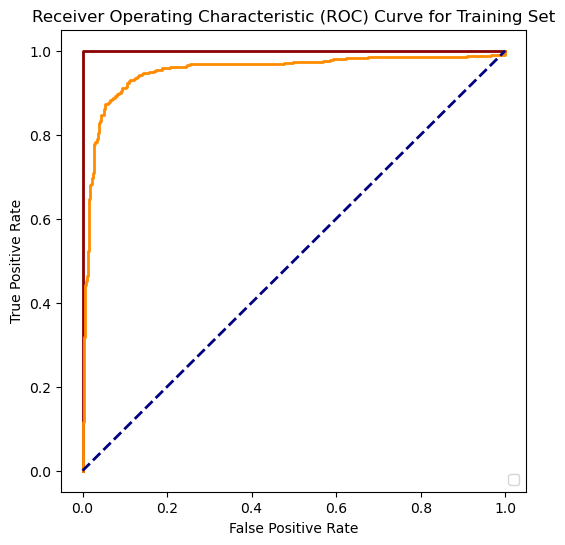

In [12]:
#ROC Curve for training
fpr1, tpr1, thresholds1 = roc_curve(Y_labels_train, pred_score_train)
fpr2, tpr2, thresholds2 = roc_curve(Y_labels_test, pred_score_test)
plt.figure(figsize=(6, 6))
plt.plot(fpr1, tpr1, color='darkred', lw=2)#, label=f'AUC = {roc_auc:.2f}'
plt.plot(fpr2, tpr2, color='darkorange', lw=2)#, label=f'AUC = {roc_auc:.2f}'
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
plt.show()